In [43]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
# Define a method clean_data
def clean_data(file_path):
    data = pd.read_csv(file_path)
    data.set_index("Player", inplace = True)
    trimmed = data.loc[:, ["GP", "TOI", "CF%", "GF%", "xGF%", "SCF%", "HDCF%", "PDO", "Off. Zone Faceoff %", "Off. Zone Start %"]]
    trimmed["TOI"] = trimmed["TOI"]/trimmed["GP"]
    trimmed.rename({"TOI":"TOI/Gm"}, axis = 1, inplace = True)
    return trimmed

In [45]:
#Load in csv files containing various on-ice metrics for SJ Sharks forwards in the 2023-24 and 2024-25 season
#All data sourced from naturalstattrick.com
sharks_data_file_path_2324 = '/Users/bryanpeltier/Downloads/Sharks Data 2324.csv'
sharks_data_file_path_2425 = '/Users/bryanpeltier/Downloads/Sharks Data 2425.csv'
sharks_data_2324 = clean_data(sharks_data_file_path_2324)
sharks_data_2425 = clean_data(sharks_data_file_path_2425)

#Insert total salary cap hit data courtesy of spotrac.com
sharks_data_2324.insert(0, "Total Cap Hit", [1450000, 863333, 5000000, 8137500, 2750000, 1100000, 3000000, 4500000, 2500000, 2000000, 775000, 775000, 4725000, 916667, 20000000, 800000, 762500])
sharks_data_2425.insert(0, "Total Cap Hit", [5000000, 6000000, 863333, 1450000, 5000000, 3641666, 2750000, 950000, 2000000, 1300000, 1800000, 2000000, 828333, 975000])


In [46]:
#Assign the data to X and y variables between '23-'24 and '24-'25
regressors = ["TOI/Gm", "CF%", "GF%", "xGF%", "SCF%", "HDCF%", "PDO", "Off. Zone Faceoff %", "Off. Zone Start %"]
X_2324 = sharks_data_2324[regressors]
y_2324 = sharks_data_2324["Total Cap Hit"]
X_2425 = sharks_data_2425[regressors]
y_2425 = sharks_data_2425["Total Cap Hit"]

In [48]:
#Fit the model using '23-'24 data and impose it on '24-'25 regressors
model = RandomForestRegressor(random_state = 1)
model.fit(X_2324, y_2324)
predictions = model.predict(X_2425)

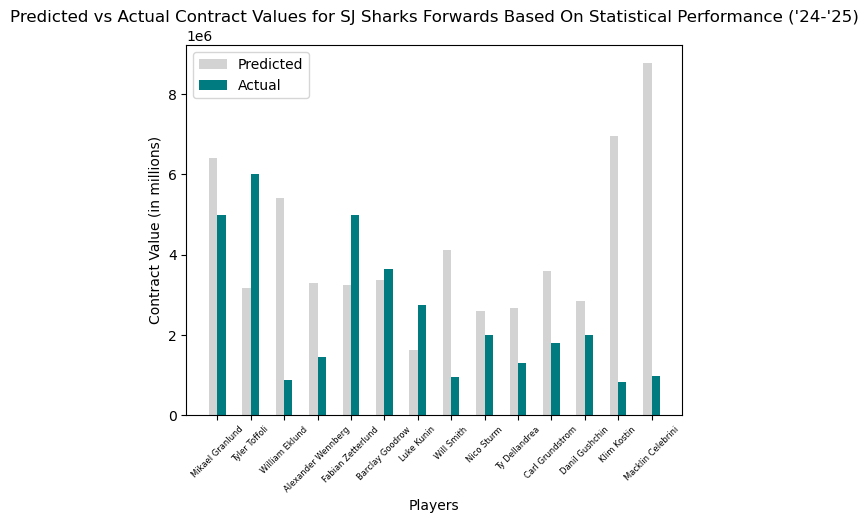

In [49]:
#Build the split bar-chart
players = sharks_data_2425.index
x = np.arange(len(players))
bar_width = 0.25
fig, ax = plt.subplots()
bars1 = ax.bar(x - bar_width/2, predictions, bar_width, label='Predicted', color='lightgray')
bars2 = ax.bar(x + bar_width/2, y_2425, bar_width, label='Actual', color='#007B7F')
ax.set_xlabel('Players')
ax.set_ylabel('Contract Value (in millions)')
ax.set_title('Predicted vs Actual Contract Values for SJ Sharks Forwards Based On Statistical Performance (\'24-\'25)')
ax.set_xticks(x)
ax.set_xticklabels(players, rotation=45, fontsize = 6)
ax.legend()
plt.show()